# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
data.shape

(506, 14)

In [5]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
target = "MEDV"

In [10]:
# predictors
X = data.drop(target, axis=1)
# target
y = data[target]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [12]:
X_train.shape

(404, 13)

In [13]:
X_test.shape

(102, 13)

In [14]:
y_train.shape

(404,)

In [15]:
y_test.shape

(102,)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [16]:
from sklearn import datasets, linear_model

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(404, 14) (404,)
(102, 14) (102,)


In [23]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
predictions

array([13.8, 22.3, 33.2, 31.5, 24.6, 42.3, 33.1, 50. ,  8.1,  5. , 15.6,
       22.9, 46.7, 26.5, 26.4, 16.6, 23.9, 28.1, 37. , 20.7, 22.2, 22.7,
       19.5,  8.5, 37.2, 20.4, 13.9, 24.1, 22.4, 34.9, 18.7, 21.1, 22. ,
       18.9, 11.8, 21.4, 22.9, 22.5, 16.1, 11.9, 21.8, 12.7, 24.5, 37.3,
       18.5, 20.1, 19.5, 26.4, 22.8, 22.2, 23.3, 13.5, 23.1, 37.6, 18.5,
       17.5, 10.9, 25. , 15.2, 23. , 32. , 19.8, 24.6, 22.6, 19.6, 21.2,
       36.1, 18. , 14.1, 26.2, 29.1, 19.3, 20.6, 18.8, 48.5, 17.5, 20.4,
       23.8, 35.1, 44. , 15. , 19.4, 13.5, 21.1, 31. , 10.5, 21.4, 16.4,
       14.4, 22.5, 17.4, 18.2, 50. , 12.6, 25. , 19.9, 21. , 22. , 14.3,
       19.5, 25. , 22.8])

Text(0, 0.5, 'Predictions')

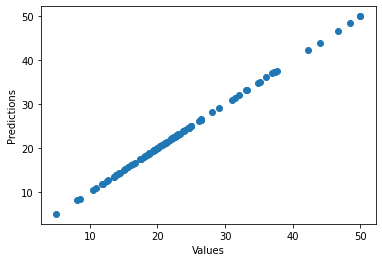

In [29]:
from matplotlib import pyplot as plt
plt.scatter(y_test, predictions)
plt.xlabel('Values')
plt.ylabel('Predictions')

## 3. Calculate and print R-squared for both the training and the testing set.

In [34]:
from sklearn import metrics
accuracy = metrics.r2_score(y, predictions)
accuracy

ValueError: Found input variables with inconsistent numbers of samples: [506, 102]

## 4. Calculate and print mean squared error for both the training and the testing set.

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [37]:
model = DecisionTreeRegressor(max_depth=1)

In [38]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [41]:
# Train error
mean_squared_error(
    y_true=y_train,
    y_pred=model.predict(X_train)
)

43.581544425474135

In [42]:
# Test error
mean_squared_error(
    y_true=y_test,
    y_pred=model.predict(X_test)
)

60.15824522165615

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [47]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [49]:
# Creating instance of Linear Regresssion with Normalised Data
lr = LR(normalize = True)
# Fitting the model
lr.fit(X_train, y_train)

LinearRegression(normalize=True)

In [53]:
# Train Set
train_predict = lr.predict(X_train)
k = mae(train_predict, y_train)
print(k)

3.288320091743927


In [54]:
# Test Set
test_predict = lr.predict(X_test)
k = mae(test_predict, y_test)
print(k)

3.2912383427306766


## Classification Model Evaluation

In [35]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [37]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
data.shape

(150, 5)

In [39]:
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
target = "class"

In [42]:
# predictors
X = data.drop(target, axis=1)
# target
y = data[target]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [44]:
X_train.shape

(120, 4)

In [45]:
X_test.shape

(30, 4)

In [46]:
y_train.shape

(120,)

In [47]:
y_test.shape

(30,)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [48]:
from sklearn.linear_model import LogisticRegression

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [56]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [58]:
from sklearn.metrics import balanced_accuracy_score
y_true = [0, 1, 0, 0, 1, 0]
y_pred = [0, 1, 0, 0, 0, 1]
balanced_accuracy_score(y_true, y_pred)

0.625

## 10. Calculate and print the precision score for both the training and the testing set.

In [62]:
from sklearn.metrics import precision_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
precision_score(y_true, y_pred, average='macro')

0.2222222222222222

In [63]:
precision_score(y_true, y_pred, average='micro')

0.3333333333333333

In [64]:
precision_score(y_true, y_pred, average='weighted')


0.2222222222222222

In [65]:
precision_score(y_true, y_pred, average=None)

array([0.66666667, 0.        , 0.        ])

In [66]:
y_pred = [0, 0, 0, 0, 0, 0]
precision_score(y_true, y_pred, average=None)

array([0.33333333, 0.        , 0.        ])

In [67]:
precision_score(y_true, y_pred, average=None, zero_division=1)

array([0.33333333, 1.        , 1.        ])

## 11. Calculate and print the recall score for both the training and the testing set.

In [69]:
from sklearn.metrics import recall_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
recall_score(y_true, y_pred, average='macro')

0.3333333333333333

In [71]:
recall_score(y_true, y_pred, average='micro')

0.3333333333333333

In [72]:
recall_score(y_true, y_pred, average='weighted')

0.3333333333333333

In [73]:
recall_score(y_true, y_pred, average=None)

array([1., 0., 0.])

In [76]:
y_true = [0, 0, 0, 0, 0, 0]

In [77]:
recall_score(y_true, y_pred, average=None)

array([0.5, 0. , 0. ])

In [75]:
recall_score(y_true, y_pred, average=None, zero_division=1)

array([0.5, 1. , 1. ])

## 13. Generate confusion matrices for both the training and the testing set.

In [94]:
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix

In [95]:
clf = svm.SVC(kernel='linear')

In [96]:
clf = clf.fit(X_train, y_train)

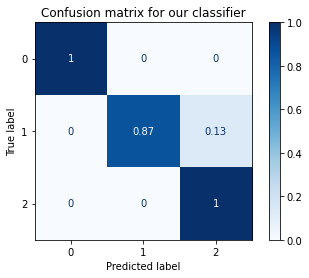

In [97]:
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.